In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# Identify the desired files

In [2]:
!unzip '../input/carvana-image-masking-challenge/train_masks.zip'
!unzip '../input/carvana-image-masking-challenge/train.zip'

img_dir = './train/'
mask_dir = './train_masks/'

!mkdir './images'
!mkdir './masks'

Archive:  ../input/carvana-image-masking-challenge/train_masks.zip
   creating: train_masks/
  inflating: train_masks/00087a6bd4dc_01_mask.gif  
 extracting: train_masks/00087a6bd4dc_02_mask.gif  
 extracting: train_masks/00087a6bd4dc_03_mask.gif  
 extracting: train_masks/00087a6bd4dc_04_mask.gif  
  inflating: train_masks/00087a6bd4dc_05_mask.gif  
  inflating: train_masks/00087a6bd4dc_06_mask.gif  
  inflating: train_masks/00087a6bd4dc_07_mask.gif  
  inflating: train_masks/00087a6bd4dc_08_mask.gif  
  inflating: train_masks/00087a6bd4dc_09_mask.gif  
  inflating: train_masks/00087a6bd4dc_10_mask.gif  
 extracting: train_masks/00087a6bd4dc_11_mask.gif  
  inflating: train_masks/00087a6bd4dc_12_mask.gif  
  inflating: train_masks/00087a6bd4dc_13_mask.gif  
  inflating: train_masks/00087a6bd4dc_14_mask.gif  
 extracting: train_masks/00087a6bd4dc_15_mask.gif  
 extracting: train_masks/00087a6bd4dc_16_mask.gif  
  inflating: train_masks/02159e548029_01_mask.gif  
 extracting: train_mask

 extracting: train_masks/1b25ea8ba94d_10_mask.gif  
 extracting: train_masks/1b25ea8ba94d_11_mask.gif  
 extracting: train_masks/1b25ea8ba94d_12_mask.gif  
 extracting: train_masks/1b25ea8ba94d_13_mask.gif  
 extracting: train_masks/1b25ea8ba94d_14_mask.gif  
 extracting: train_masks/1b25ea8ba94d_15_mask.gif  
 extracting: train_masks/1b25ea8ba94d_16_mask.gif  
 extracting: train_masks/1ba84b81628e_01_mask.gif  
 extracting: train_masks/1ba84b81628e_02_mask.gif  
 extracting: train_masks/1ba84b81628e_03_mask.gif  
 extracting: train_masks/1ba84b81628e_04_mask.gif  
 extracting: train_masks/1ba84b81628e_05_mask.gif  
 extracting: train_masks/1ba84b81628e_06_mask.gif  
 extracting: train_masks/1ba84b81628e_07_mask.gif  
 extracting: train_masks/1ba84b81628e_08_mask.gif  
  inflating: train_masks/1ba84b81628e_09_mask.gif  
 extracting: train_masks/1ba84b81628e_10_mask.gif  
 extracting: train_masks/1ba84b81628e_11_mask.gif  
 extracting: train_masks/1ba84b81628e_12_mask.gif  
 extracting:

 extracting: train_masks/2f39abb12388_15_mask.gif  
  inflating: train_masks/2f39abb12388_16_mask.gif  
 extracting: train_masks/2faf504842df_01_mask.gif  
 extracting: train_masks/2faf504842df_02_mask.gif  
 extracting: train_masks/2faf504842df_03_mask.gif  
 extracting: train_masks/2faf504842df_04_mask.gif  
  inflating: train_masks/2faf504842df_05_mask.gif  
  inflating: train_masks/2faf504842df_06_mask.gif  
 extracting: train_masks/2faf504842df_07_mask.gif  
 extracting: train_masks/2faf504842df_08_mask.gif  
  inflating: train_masks/2faf504842df_09_mask.gif  
  inflating: train_masks/2faf504842df_10_mask.gif  
  inflating: train_masks/2faf504842df_11_mask.gif  
  inflating: train_masks/2faf504842df_12_mask.gif  
 extracting: train_masks/2faf504842df_13_mask.gif  
 extracting: train_masks/2faf504842df_14_mask.gif  
 extracting: train_masks/2faf504842df_15_mask.gif  
 extracting: train_masks/2faf504842df_16_mask.gif  
  inflating: train_masks/304437bad7ff_01_mask.gif  
  inflating:

 extracting: train_masks/3cb21125f126_03_mask.gif  
 extracting: train_masks/3cb21125f126_04_mask.gif  
 extracting: train_masks/3cb21125f126_05_mask.gif  
 extracting: train_masks/3cb21125f126_06_mask.gif  
 extracting: train_masks/3cb21125f126_07_mask.gif  
 extracting: train_masks/3cb21125f126_08_mask.gif  
 extracting: train_masks/3cb21125f126_09_mask.gif  
 extracting: train_masks/3cb21125f126_10_mask.gif  
 extracting: train_masks/3cb21125f126_11_mask.gif  
 extracting: train_masks/3cb21125f126_12_mask.gif  
 extracting: train_masks/3cb21125f126_13_mask.gif  
 extracting: train_masks/3cb21125f126_14_mask.gif  
 extracting: train_masks/3cb21125f126_15_mask.gif  
 extracting: train_masks/3cb21125f126_16_mask.gif  
 extracting: train_masks/3d7a1030deeb_01_mask.gif  
 extracting: train_masks/3d7a1030deeb_02_mask.gif  
 extracting: train_masks/3d7a1030deeb_03_mask.gif  
 extracting: train_masks/3d7a1030deeb_04_mask.gif  
 extracting: train_masks/3d7a1030deeb_05_mask.gif  
 extracting:

 extracting: train_masks/4f1f065d78ac_10_mask.gif  
  inflating: train_masks/4f1f065d78ac_11_mask.gif  
  inflating: train_masks/4f1f065d78ac_12_mask.gif  
  inflating: train_masks/4f1f065d78ac_13_mask.gif  
 extracting: train_masks/4f1f065d78ac_14_mask.gif  
 extracting: train_masks/4f1f065d78ac_15_mask.gif  
 extracting: train_masks/4f1f065d78ac_16_mask.gif  
 extracting: train_masks/4fc2470c0f7b_01_mask.gif  
 extracting: train_masks/4fc2470c0f7b_02_mask.gif  
 extracting: train_masks/4fc2470c0f7b_03_mask.gif  
 extracting: train_masks/4fc2470c0f7b_04_mask.gif  
 extracting: train_masks/4fc2470c0f7b_05_mask.gif  
  inflating: train_masks/4fc2470c0f7b_06_mask.gif  
 extracting: train_masks/4fc2470c0f7b_07_mask.gif  
 extracting: train_masks/4fc2470c0f7b_08_mask.gif  
 extracting: train_masks/4fc2470c0f7b_09_mask.gif  
 extracting: train_masks/4fc2470c0f7b_10_mask.gif  
 extracting: train_masks/4fc2470c0f7b_11_mask.gif  
 extracting: train_masks/4fc2470c0f7b_12_mask.gif  
 extracting:

  inflating: train_masks/69915dab0755_01_mask.gif  
 extracting: train_masks/69915dab0755_02_mask.gif  
 extracting: train_masks/69915dab0755_03_mask.gif  
  inflating: train_masks/69915dab0755_04_mask.gif  
  inflating: train_masks/69915dab0755_05_mask.gif  
  inflating: train_masks/69915dab0755_06_mask.gif  
 extracting: train_masks/69915dab0755_07_mask.gif  
 extracting: train_masks/69915dab0755_08_mask.gif  
  inflating: train_masks/69915dab0755_09_mask.gif  
  inflating: train_masks/69915dab0755_10_mask.gif  
 extracting: train_masks/69915dab0755_11_mask.gif  
  inflating: train_masks/69915dab0755_12_mask.gif  
 extracting: train_masks/69915dab0755_13_mask.gif  
  inflating: train_masks/69915dab0755_14_mask.gif  
 extracting: train_masks/69915dab0755_15_mask.gif  
 extracting: train_masks/69915dab0755_16_mask.gif  
 extracting: train_masks/69fba9e8f572_01_mask.gif  
 extracting: train_masks/69fba9e8f572_02_mask.gif  
 extracting: train_masks/69fba9e8f572_03_mask.gif  
 extracting:

  inflating: train_masks/795d2ee07ce2_07_mask.gif  
 extracting: train_masks/795d2ee07ce2_08_mask.gif  
 extracting: train_masks/795d2ee07ce2_09_mask.gif  
 extracting: train_masks/795d2ee07ce2_10_mask.gif  
 extracting: train_masks/795d2ee07ce2_11_mask.gif  
 extracting: train_masks/795d2ee07ce2_12_mask.gif  
  inflating: train_masks/795d2ee07ce2_13_mask.gif  
 extracting: train_masks/795d2ee07ce2_14_mask.gif  
 extracting: train_masks/795d2ee07ce2_15_mask.gif  
 extracting: train_masks/795d2ee07ce2_16_mask.gif  
 extracting: train_masks/79a7691a90b1_01_mask.gif  
  inflating: train_masks/79a7691a90b1_02_mask.gif  
  inflating: train_masks/79a7691a90b1_03_mask.gif  
 extracting: train_masks/79a7691a90b1_04_mask.gif  
  inflating: train_masks/79a7691a90b1_05_mask.gif  
  inflating: train_masks/79a7691a90b1_06_mask.gif  
  inflating: train_masks/79a7691a90b1_07_mask.gif  
  inflating: train_masks/79a7691a90b1_08_mask.gif  
  inflating: train_masks/79a7691a90b1_09_mask.gif  
  inflating:

  inflating: train_masks/90b65c521a8b_12_mask.gif  
 extracting: train_masks/90b65c521a8b_13_mask.gif  
 extracting: train_masks/90b65c521a8b_14_mask.gif  
  inflating: train_masks/90b65c521a8b_15_mask.gif  
 extracting: train_masks/90b65c521a8b_16_mask.gif  
 extracting: train_masks/90fdd8932877_01_mask.gif  
 extracting: train_masks/90fdd8932877_02_mask.gif  
 extracting: train_masks/90fdd8932877_03_mask.gif  
 extracting: train_masks/90fdd8932877_04_mask.gif  
  inflating: train_masks/90fdd8932877_05_mask.gif  
  inflating: train_masks/90fdd8932877_06_mask.gif  
 extracting: train_masks/90fdd8932877_07_mask.gif  
 extracting: train_masks/90fdd8932877_08_mask.gif  
  inflating: train_masks/90fdd8932877_09_mask.gif  
 extracting: train_masks/90fdd8932877_10_mask.gif  
 extracting: train_masks/90fdd8932877_11_mask.gif  
 extracting: train_masks/90fdd8932877_12_mask.gif  
 extracting: train_masks/90fdd8932877_13_mask.gif  
 extracting: train_masks/90fdd8932877_14_mask.gif  
 extracting:

 extracting: train_masks/ae296a20fdd9_11_mask.gif  
 extracting: train_masks/ae296a20fdd9_12_mask.gif  
 extracting: train_masks/ae296a20fdd9_13_mask.gif  
 extracting: train_masks/ae296a20fdd9_14_mask.gif  
 extracting: train_masks/ae296a20fdd9_15_mask.gif  
 extracting: train_masks/ae296a20fdd9_16_mask.gif  
  inflating: train_masks/b1a27da4f01c_01_mask.gif  
 extracting: train_masks/b1a27da4f01c_02_mask.gif  
  inflating: train_masks/b1a27da4f01c_03_mask.gif  
 extracting: train_masks/b1a27da4f01c_04_mask.gif  
 extracting: train_masks/b1a27da4f01c_05_mask.gif  
 extracting: train_masks/b1a27da4f01c_06_mask.gif  
  inflating: train_masks/b1a27da4f01c_07_mask.gif  
  inflating: train_masks/b1a27da4f01c_08_mask.gif  
  inflating: train_masks/b1a27da4f01c_09_mask.gif  
 extracting: train_masks/b1a27da4f01c_10_mask.gif  
 extracting: train_masks/b1a27da4f01c_11_mask.gif  
 extracting: train_masks/b1a27da4f01c_12_mask.gif  
  inflating: train_masks/b1a27da4f01c_13_mask.gif  
 extracting:

  inflating: train_masks/c53e374fdd72_12_mask.gif  
  inflating: train_masks/c53e374fdd72_13_mask.gif  
  inflating: train_masks/c53e374fdd72_14_mask.gif  
 extracting: train_masks/c53e374fdd72_15_mask.gif  
 extracting: train_masks/c53e374fdd72_16_mask.gif  
 extracting: train_masks/c6f50d44f141_01_mask.gif  
 extracting: train_masks/c6f50d44f141_02_mask.gif  
 extracting: train_masks/c6f50d44f141_03_mask.gif  
  inflating: train_masks/c6f50d44f141_04_mask.gif  
 extracting: train_masks/c6f50d44f141_05_mask.gif  
 extracting: train_masks/c6f50d44f141_06_mask.gif  
  inflating: train_masks/c6f50d44f141_07_mask.gif  
 extracting: train_masks/c6f50d44f141_08_mask.gif  
 extracting: train_masks/c6f50d44f141_09_mask.gif  
 extracting: train_masks/c6f50d44f141_10_mask.gif  
 extracting: train_masks/c6f50d44f141_11_mask.gif  
  inflating: train_masks/c6f50d44f141_12_mask.gif  
  inflating: train_masks/c6f50d44f141_13_mask.gif  
 extracting: train_masks/c6f50d44f141_14_mask.gif  
 extracting:

 extracting: train_masks/dc1c5c2b9e49_02_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_03_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_04_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_05_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_06_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_07_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_08_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_09_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_10_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_11_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_12_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_13_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_14_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_15_mask.gif  
 extracting: train_masks/dc1c5c2b9e49_16_mask.gif  
 extracting: train_masks/dc995bf5296a_01_mask.gif  
 extracting: train_masks/dc995bf5296a_02_mask.gif  
 extracting: train_masks/dc995bf5296a_03_mask.gif  
 extracting: train_masks/dc995bf5296a_04_mask.gif  
 extracting:

 extracting: train_masks/efaef69e148d_09_mask.gif  
 extracting: train_masks/efaef69e148d_10_mask.gif  
 extracting: train_masks/efaef69e148d_11_mask.gif  
  inflating: train_masks/efaef69e148d_12_mask.gif  
  inflating: train_masks/efaef69e148d_13_mask.gif  
 extracting: train_masks/efaef69e148d_14_mask.gif  
 extracting: train_masks/efaef69e148d_15_mask.gif  
 extracting: train_masks/efaef69e148d_16_mask.gif  
 extracting: train_masks/f00905abd3d7_01_mask.gif  
 extracting: train_masks/f00905abd3d7_02_mask.gif  
 extracting: train_masks/f00905abd3d7_03_mask.gif  
 extracting: train_masks/f00905abd3d7_04_mask.gif  
 extracting: train_masks/f00905abd3d7_05_mask.gif  
 extracting: train_masks/f00905abd3d7_06_mask.gif  
 extracting: train_masks/f00905abd3d7_07_mask.gif  
 extracting: train_masks/f00905abd3d7_08_mask.gif  
 extracting: train_masks/f00905abd3d7_09_mask.gif  
 extracting: train_masks/f00905abd3d7_10_mask.gif  
 extracting: train_masks/f00905abd3d7_11_mask.gif  
 extracting:

Archive:  ../input/carvana-image-masking-challenge/train.zip
   creating: train/
  inflating: train/00087a6bd4dc_01.jpg  
  inflating: train/00087a6bd4dc_02.jpg  
  inflating: train/00087a6bd4dc_03.jpg  
  inflating: train/00087a6bd4dc_04.jpg  
  inflating: train/00087a6bd4dc_05.jpg  
  inflating: train/00087a6bd4dc_06.jpg  
  inflating: train/00087a6bd4dc_07.jpg  
  inflating: train/00087a6bd4dc_08.jpg  
  inflating: train/00087a6bd4dc_09.jpg  
  inflating: train/00087a6bd4dc_10.jpg  
  inflating: train/00087a6bd4dc_11.jpg  
  inflating: train/00087a6bd4dc_12.jpg  
  inflating: train/00087a6bd4dc_13.jpg  
  inflating: train/00087a6bd4dc_14.jpg  
  inflating: train/00087a6bd4dc_15.jpg  
  inflating: train/00087a6bd4dc_16.jpg  
  inflating: train/02159e548029_01.jpg  
  inflating: train/02159e548029_02.jpg  
  inflating: train/02159e548029_03.jpg  
  inflating: train/02159e548029_04.jpg  
  inflating: train/02159e548029_05.jpg  
  inflating: train/02159e548029_06.jpg  
  inflating: trai

  inflating: train/0de66245f268_04.jpg  
  inflating: train/0de66245f268_05.jpg  
  inflating: train/0de66245f268_06.jpg  
  inflating: train/0de66245f268_07.jpg  
  inflating: train/0de66245f268_08.jpg  
  inflating: train/0de66245f268_09.jpg  
  inflating: train/0de66245f268_10.jpg  
  inflating: train/0de66245f268_11.jpg  
  inflating: train/0de66245f268_12.jpg  
  inflating: train/0de66245f268_13.jpg  
  inflating: train/0de66245f268_14.jpg  
  inflating: train/0de66245f268_15.jpg  
  inflating: train/0de66245f268_16.jpg  
  inflating: train/0ed6904e1004_01.jpg  
  inflating: train/0ed6904e1004_02.jpg  
  inflating: train/0ed6904e1004_03.jpg  
  inflating: train/0ed6904e1004_04.jpg  
  inflating: train/0ed6904e1004_05.jpg  
  inflating: train/0ed6904e1004_06.jpg  
  inflating: train/0ed6904e1004_07.jpg  
  inflating: train/0ed6904e1004_08.jpg  
  inflating: train/0ed6904e1004_09.jpg  
  inflating: train/0ed6904e1004_10.jpg  
  inflating: train/0ed6904e1004_11.jpg  
  inflating: tra

  inflating: train/154ee2b6d27a_09.jpg  
  inflating: train/154ee2b6d27a_10.jpg  
  inflating: train/154ee2b6d27a_11.jpg  
  inflating: train/154ee2b6d27a_12.jpg  
  inflating: train/154ee2b6d27a_13.jpg  
  inflating: train/154ee2b6d27a_14.jpg  
  inflating: train/154ee2b6d27a_15.jpg  
  inflating: train/154ee2b6d27a_16.jpg  
  inflating: train/169f5f6d8c9d_01.jpg  
  inflating: train/169f5f6d8c9d_02.jpg  
  inflating: train/169f5f6d8c9d_03.jpg  
  inflating: train/169f5f6d8c9d_04.jpg  
  inflating: train/169f5f6d8c9d_05.jpg  
  inflating: train/169f5f6d8c9d_06.jpg  
  inflating: train/169f5f6d8c9d_07.jpg  
  inflating: train/169f5f6d8c9d_08.jpg  
  inflating: train/169f5f6d8c9d_09.jpg  
  inflating: train/169f5f6d8c9d_10.jpg  
  inflating: train/169f5f6d8c9d_11.jpg  
  inflating: train/169f5f6d8c9d_12.jpg  
  inflating: train/169f5f6d8c9d_13.jpg  
  inflating: train/169f5f6d8c9d_14.jpg  
  inflating: train/169f5f6d8c9d_15.jpg  
  inflating: train/169f5f6d8c9d_16.jpg  
  inflating: tra

  inflating: train/21a7e6726ee3_15.jpg  
  inflating: train/21a7e6726ee3_16.jpg  
  inflating: train/2267f4aa0d2c_01.jpg  
  inflating: train/2267f4aa0d2c_02.jpg  
  inflating: train/2267f4aa0d2c_03.jpg  
  inflating: train/2267f4aa0d2c_04.jpg  
  inflating: train/2267f4aa0d2c_05.jpg  
  inflating: train/2267f4aa0d2c_06.jpg  
  inflating: train/2267f4aa0d2c_07.jpg  
  inflating: train/2267f4aa0d2c_08.jpg  
  inflating: train/2267f4aa0d2c_09.jpg  
  inflating: train/2267f4aa0d2c_10.jpg  
  inflating: train/2267f4aa0d2c_11.jpg  
  inflating: train/2267f4aa0d2c_12.jpg  
  inflating: train/2267f4aa0d2c_13.jpg  
  inflating: train/2267f4aa0d2c_14.jpg  
  inflating: train/2267f4aa0d2c_15.jpg  
  inflating: train/2267f4aa0d2c_16.jpg  
  inflating: train/2335eef27de6_01.jpg  
  inflating: train/2335eef27de6_02.jpg  
  inflating: train/2335eef27de6_03.jpg  
  inflating: train/2335eef27de6_04.jpg  
  inflating: train/2335eef27de6_05.jpg  
  inflating: train/2335eef27de6_06.jpg  
  inflating: tra

  inflating: train/2c57132da7a0_05.jpg  
  inflating: train/2c57132da7a0_06.jpg  
  inflating: train/2c57132da7a0_07.jpg  
  inflating: train/2c57132da7a0_08.jpg  
  inflating: train/2c57132da7a0_09.jpg  
  inflating: train/2c57132da7a0_10.jpg  
  inflating: train/2c57132da7a0_11.jpg  
  inflating: train/2c57132da7a0_12.jpg  
  inflating: train/2c57132da7a0_13.jpg  
  inflating: train/2c57132da7a0_14.jpg  
  inflating: train/2c57132da7a0_15.jpg  
  inflating: train/2c57132da7a0_16.jpg  
  inflating: train/2cb06c1f5bb1_01.jpg  
  inflating: train/2cb06c1f5bb1_02.jpg  
  inflating: train/2cb06c1f5bb1_03.jpg  
  inflating: train/2cb06c1f5bb1_04.jpg  
  inflating: train/2cb06c1f5bb1_05.jpg  
  inflating: train/2cb06c1f5bb1_06.jpg  
  inflating: train/2cb06c1f5bb1_07.jpg  
  inflating: train/2cb06c1f5bb1_08.jpg  
  inflating: train/2cb06c1f5bb1_09.jpg  
  inflating: train/2cb06c1f5bb1_10.jpg  
  inflating: train/2cb06c1f5bb1_11.jpg  
  inflating: train/2cb06c1f5bb1_12.jpg  
  inflating: tra

  inflating: train/344ece157efc_11.jpg  
  inflating: train/344ece157efc_12.jpg  
  inflating: train/344ece157efc_13.jpg  
  inflating: train/344ece157efc_14.jpg  
  inflating: train/344ece157efc_15.jpg  
  inflating: train/344ece157efc_16.jpg  
  inflating: train/34b0c08544a5_01.jpg  
  inflating: train/34b0c08544a5_02.jpg  
  inflating: train/34b0c08544a5_03.jpg  
  inflating: train/34b0c08544a5_04.jpg  
  inflating: train/34b0c08544a5_05.jpg  
  inflating: train/34b0c08544a5_06.jpg  
  inflating: train/34b0c08544a5_07.jpg  
  inflating: train/34b0c08544a5_08.jpg  
  inflating: train/34b0c08544a5_09.jpg  
  inflating: train/34b0c08544a5_10.jpg  
  inflating: train/34b0c08544a5_11.jpg  
  inflating: train/34b0c08544a5_12.jpg  
  inflating: train/34b0c08544a5_13.jpg  
  inflating: train/34b0c08544a5_14.jpg  
  inflating: train/34b0c08544a5_15.jpg  
  inflating: train/34b0c08544a5_16.jpg  
  inflating: train/34defeec3ce6_01.jpg  
  inflating: train/34defeec3ce6_02.jpg  
  inflating: tra

  inflating: train/3b45f83ba3fa_14.jpg  
  inflating: train/3b45f83ba3fa_15.jpg  
  inflating: train/3b45f83ba3fa_16.jpg  
  inflating: train/3bca821c8c41_01.jpg  
  inflating: train/3bca821c8c41_02.jpg  
  inflating: train/3bca821c8c41_03.jpg  
  inflating: train/3bca821c8c41_04.jpg  
  inflating: train/3bca821c8c41_05.jpg  
  inflating: train/3bca821c8c41_06.jpg  
  inflating: train/3bca821c8c41_07.jpg  
  inflating: train/3bca821c8c41_08.jpg  
  inflating: train/3bca821c8c41_09.jpg  
  inflating: train/3bca821c8c41_10.jpg  
  inflating: train/3bca821c8c41_11.jpg  
  inflating: train/3bca821c8c41_12.jpg  
  inflating: train/3bca821c8c41_13.jpg  
  inflating: train/3bca821c8c41_14.jpg  
  inflating: train/3bca821c8c41_15.jpg  
  inflating: train/3bca821c8c41_16.jpg  
  inflating: train/3c16409ab9db_01.jpg  
  inflating: train/3c16409ab9db_02.jpg  
  inflating: train/3c16409ab9db_03.jpg  
  inflating: train/3c16409ab9db_04.jpg  
  inflating: train/3c16409ab9db_05.jpg  
  inflating: tra

  inflating: train/42b3feca1993_07.jpg  
  inflating: train/42b3feca1993_08.jpg  
  inflating: train/42b3feca1993_09.jpg  
  inflating: train/42b3feca1993_10.jpg  
  inflating: train/42b3feca1993_11.jpg  
  inflating: train/42b3feca1993_12.jpg  
  inflating: train/42b3feca1993_13.jpg  
  inflating: train/42b3feca1993_14.jpg  
  inflating: train/42b3feca1993_15.jpg  
  inflating: train/42b3feca1993_16.jpg  
  inflating: train/42d81612e2ce_01.jpg  
  inflating: train/42d81612e2ce_02.jpg  
  inflating: train/42d81612e2ce_03.jpg  
  inflating: train/42d81612e2ce_04.jpg  
  inflating: train/42d81612e2ce_05.jpg  
  inflating: train/42d81612e2ce_06.jpg  
  inflating: train/42d81612e2ce_07.jpg  
  inflating: train/42d81612e2ce_08.jpg  
  inflating: train/42d81612e2ce_09.jpg  
  inflating: train/42d81612e2ce_10.jpg  
  inflating: train/42d81612e2ce_11.jpg  
  inflating: train/42d81612e2ce_12.jpg  
  inflating: train/42d81612e2ce_13.jpg  
  inflating: train/42d81612e2ce_14.jpg  
  inflating: tra

  inflating: train/4f0397cf7937_01.jpg  
  inflating: train/4f0397cf7937_02.jpg  
  inflating: train/4f0397cf7937_03.jpg  
  inflating: train/4f0397cf7937_04.jpg  
  inflating: train/4f0397cf7937_05.jpg  
  inflating: train/4f0397cf7937_06.jpg  
  inflating: train/4f0397cf7937_07.jpg  
  inflating: train/4f0397cf7937_08.jpg  
  inflating: train/4f0397cf7937_09.jpg  
  inflating: train/4f0397cf7937_10.jpg  
  inflating: train/4f0397cf7937_11.jpg  
  inflating: train/4f0397cf7937_12.jpg  
  inflating: train/4f0397cf7937_13.jpg  
  inflating: train/4f0397cf7937_14.jpg  
  inflating: train/4f0397cf7937_15.jpg  
  inflating: train/4f0397cf7937_16.jpg  
  inflating: train/4f1f065d78ac_01.jpg  
  inflating: train/4f1f065d78ac_02.jpg  
  inflating: train/4f1f065d78ac_03.jpg  
  inflating: train/4f1f065d78ac_04.jpg  
  inflating: train/4f1f065d78ac_05.jpg  
  inflating: train/4f1f065d78ac_06.jpg  
  inflating: train/4f1f065d78ac_07.jpg  
  inflating: train/4f1f065d78ac_08.jpg  
  inflating: tra

  inflating: train/5d95d80e10a9_01.jpg  
  inflating: train/5d95d80e10a9_02.jpg  
  inflating: train/5d95d80e10a9_03.jpg  
  inflating: train/5d95d80e10a9_04.jpg  
  inflating: train/5d95d80e10a9_05.jpg  
  inflating: train/5d95d80e10a9_06.jpg  
  inflating: train/5d95d80e10a9_07.jpg  
  inflating: train/5d95d80e10a9_08.jpg  
  inflating: train/5d95d80e10a9_09.jpg  
  inflating: train/5d95d80e10a9_10.jpg  
  inflating: train/5d95d80e10a9_11.jpg  
  inflating: train/5d95d80e10a9_12.jpg  
  inflating: train/5d95d80e10a9_13.jpg  
  inflating: train/5d95d80e10a9_14.jpg  
  inflating: train/5d95d80e10a9_15.jpg  
  inflating: train/5d95d80e10a9_16.jpg  
  inflating: train/5df60cf7cab2_01.jpg  
  inflating: train/5df60cf7cab2_02.jpg  
  inflating: train/5df60cf7cab2_03.jpg  
  inflating: train/5df60cf7cab2_04.jpg  
  inflating: train/5df60cf7cab2_05.jpg  
  inflating: train/5df60cf7cab2_06.jpg  
  inflating: train/5df60cf7cab2_07.jpg  
  inflating: train/5df60cf7cab2_08.jpg  
  inflating: tra

  inflating: train/68fcee2be01f_08.jpg  
  inflating: train/68fcee2be01f_09.jpg  
  inflating: train/68fcee2be01f_10.jpg  
  inflating: train/68fcee2be01f_11.jpg  
  inflating: train/68fcee2be01f_12.jpg  
  inflating: train/68fcee2be01f_13.jpg  
  inflating: train/68fcee2be01f_14.jpg  
  inflating: train/68fcee2be01f_15.jpg  
  inflating: train/68fcee2be01f_16.jpg  
  inflating: train/695f39dfac16_01.jpg  
  inflating: train/695f39dfac16_02.jpg  
  inflating: train/695f39dfac16_03.jpg  
  inflating: train/695f39dfac16_04.jpg  
  inflating: train/695f39dfac16_05.jpg  
  inflating: train/695f39dfac16_06.jpg  
  inflating: train/695f39dfac16_07.jpg  
  inflating: train/695f39dfac16_08.jpg  
  inflating: train/695f39dfac16_09.jpg  
  inflating: train/695f39dfac16_10.jpg  
  inflating: train/695f39dfac16_11.jpg  
  inflating: train/695f39dfac16_12.jpg  
  inflating: train/695f39dfac16_13.jpg  
  inflating: train/695f39dfac16_14.jpg  
  inflating: train/695f39dfac16_15.jpg  
  inflating: tra

  inflating: train/6d21aad248e4_03.jpg  
  inflating: train/6d21aad248e4_04.jpg  
  inflating: train/6d21aad248e4_05.jpg  
  inflating: train/6d21aad248e4_06.jpg  
  inflating: train/6d21aad248e4_07.jpg  
  inflating: train/6d21aad248e4_08.jpg  
  inflating: train/6d21aad248e4_09.jpg  
  inflating: train/6d21aad248e4_10.jpg  
  inflating: train/6d21aad248e4_11.jpg  
  inflating: train/6d21aad248e4_12.jpg  
  inflating: train/6d21aad248e4_13.jpg  
  inflating: train/6d21aad248e4_14.jpg  
  inflating: train/6d21aad248e4_15.jpg  
  inflating: train/6d21aad248e4_16.jpg  
  inflating: train/6d375bc2ece1_01.jpg  
  inflating: train/6d375bc2ece1_02.jpg  
  inflating: train/6d375bc2ece1_03.jpg  
  inflating: train/6d375bc2ece1_04.jpg  
  inflating: train/6d375bc2ece1_05.jpg  
  inflating: train/6d375bc2ece1_06.jpg  
  inflating: train/6d375bc2ece1_07.jpg  
  inflating: train/6d375bc2ece1_08.jpg  
  inflating: train/6d375bc2ece1_09.jpg  
  inflating: train/6d375bc2ece1_10.jpg  
  inflating: tra

  inflating: train/795d2ee07ce2_01.jpg  
  inflating: train/795d2ee07ce2_02.jpg  
  inflating: train/795d2ee07ce2_03.jpg  
  inflating: train/795d2ee07ce2_04.jpg  
  inflating: train/795d2ee07ce2_05.jpg  
  inflating: train/795d2ee07ce2_06.jpg  
  inflating: train/795d2ee07ce2_07.jpg  
  inflating: train/795d2ee07ce2_08.jpg  
  inflating: train/795d2ee07ce2_09.jpg  
  inflating: train/795d2ee07ce2_10.jpg  
  inflating: train/795d2ee07ce2_11.jpg  
  inflating: train/795d2ee07ce2_12.jpg  
  inflating: train/795d2ee07ce2_13.jpg  
  inflating: train/795d2ee07ce2_14.jpg  
  inflating: train/795d2ee07ce2_15.jpg  
  inflating: train/795d2ee07ce2_16.jpg  
  inflating: train/79a7691a90b1_01.jpg  
  inflating: train/79a7691a90b1_02.jpg  
  inflating: train/79a7691a90b1_03.jpg  
  inflating: train/79a7691a90b1_04.jpg  
  inflating: train/79a7691a90b1_05.jpg  
  inflating: train/79a7691a90b1_06.jpg  
  inflating: train/79a7691a90b1_07.jpg  
  inflating: train/79a7691a90b1_08.jpg  
  inflating: tra

  inflating: train/878738468f6b_13.jpg  
  inflating: train/878738468f6b_14.jpg  
  inflating: train/878738468f6b_15.jpg  
  inflating: train/878738468f6b_16.jpg  
  inflating: train/87e334269396_01.jpg  
  inflating: train/87e334269396_02.jpg  
  inflating: train/87e334269396_03.jpg  
  inflating: train/87e334269396_04.jpg  
  inflating: train/87e334269396_05.jpg  
  inflating: train/87e334269396_06.jpg  
  inflating: train/87e334269396_07.jpg  
  inflating: train/87e334269396_08.jpg  
  inflating: train/87e334269396_09.jpg  
  inflating: train/87e334269396_10.jpg  
  inflating: train/87e334269396_11.jpg  
  inflating: train/87e334269396_12.jpg  
  inflating: train/87e334269396_13.jpg  
  inflating: train/87e334269396_14.jpg  
  inflating: train/87e334269396_15.jpg  
  inflating: train/87e334269396_16.jpg  
  inflating: train/880ab8468df2_01.jpg  
  inflating: train/880ab8468df2_02.jpg  
  inflating: train/880ab8468df2_03.jpg  
  inflating: train/880ab8468df2_04.jpg  
  inflating: tra

  inflating: train/90fdd8932877_05.jpg  
  inflating: train/90fdd8932877_06.jpg  
  inflating: train/90fdd8932877_07.jpg  
  inflating: train/90fdd8932877_08.jpg  
  inflating: train/90fdd8932877_09.jpg  
  inflating: train/90fdd8932877_10.jpg  
  inflating: train/90fdd8932877_11.jpg  
  inflating: train/90fdd8932877_12.jpg  
  inflating: train/90fdd8932877_13.jpg  
  inflating: train/90fdd8932877_14.jpg  
  inflating: train/90fdd8932877_15.jpg  
  inflating: train/90fdd8932877_16.jpg  
  inflating: train/917f262f1608_01.jpg  
  inflating: train/917f262f1608_02.jpg  
  inflating: train/917f262f1608_03.jpg  
  inflating: train/917f262f1608_04.jpg  
  inflating: train/917f262f1608_05.jpg  
  inflating: train/917f262f1608_06.jpg  
  inflating: train/917f262f1608_07.jpg  
  inflating: train/917f262f1608_08.jpg  
  inflating: train/917f262f1608_09.jpg  
  inflating: train/917f262f1608_10.jpg  
  inflating: train/917f262f1608_11.jpg  
  inflating: train/917f262f1608_12.jpg  
  inflating: tra

  inflating: train/a070dbb32d2b_16.jpg  
  inflating: train/a078586ccdee_01.jpg  
  inflating: train/a078586ccdee_02.jpg  
  inflating: train/a078586ccdee_03.jpg  
  inflating: train/a078586ccdee_04.jpg  
  inflating: train/a078586ccdee_05.jpg  
  inflating: train/a078586ccdee_06.jpg  
  inflating: train/a078586ccdee_07.jpg  
  inflating: train/a078586ccdee_08.jpg  
  inflating: train/a078586ccdee_09.jpg  
  inflating: train/a078586ccdee_10.jpg  
  inflating: train/a078586ccdee_11.jpg  
  inflating: train/a078586ccdee_12.jpg  
  inflating: train/a078586ccdee_13.jpg  
  inflating: train/a078586ccdee_14.jpg  
  inflating: train/a078586ccdee_15.jpg  
  inflating: train/a078586ccdee_16.jpg  
  inflating: train/a1038b207299_01.jpg  
  inflating: train/a1038b207299_02.jpg  
  inflating: train/a1038b207299_03.jpg  
  inflating: train/a1038b207299_04.jpg  
  inflating: train/a1038b207299_05.jpg  
  inflating: train/a1038b207299_06.jpg  
  inflating: train/a1038b207299_07.jpg  
  inflating: tra

  inflating: train/b1a27da4f01c_01.jpg  
  inflating: train/b1a27da4f01c_02.jpg  
  inflating: train/b1a27da4f01c_03.jpg  
  inflating: train/b1a27da4f01c_04.jpg  
  inflating: train/b1a27da4f01c_05.jpg  
  inflating: train/b1a27da4f01c_06.jpg  
  inflating: train/b1a27da4f01c_07.jpg  
  inflating: train/b1a27da4f01c_08.jpg  
  inflating: train/b1a27da4f01c_09.jpg  
  inflating: train/b1a27da4f01c_10.jpg  
  inflating: train/b1a27da4f01c_11.jpg  
  inflating: train/b1a27da4f01c_12.jpg  
  inflating: train/b1a27da4f01c_13.jpg  
  inflating: train/b1a27da4f01c_14.jpg  
  inflating: train/b1a27da4f01c_15.jpg  
  inflating: train/b1a27da4f01c_16.jpg  
  inflating: train/b24fd9084449_01.jpg  
  inflating: train/b24fd9084449_02.jpg  
  inflating: train/b24fd9084449_03.jpg  
  inflating: train/b24fd9084449_04.jpg  
  inflating: train/b24fd9084449_05.jpg  
  inflating: train/b24fd9084449_06.jpg  
  inflating: train/b24fd9084449_07.jpg  
  inflating: train/b24fd9084449_08.jpg  
  inflating: tra

  inflating: train/bf92e198d9b6_12.jpg  
  inflating: train/bf92e198d9b6_13.jpg  
  inflating: train/bf92e198d9b6_14.jpg  
  inflating: train/bf92e198d9b6_15.jpg  
  inflating: train/bf92e198d9b6_16.jpg  
  inflating: train/bf9932f7aca8_01.jpg  
  inflating: train/bf9932f7aca8_02.jpg  
  inflating: train/bf9932f7aca8_03.jpg  
  inflating: train/bf9932f7aca8_04.jpg  
  inflating: train/bf9932f7aca8_05.jpg  
  inflating: train/bf9932f7aca8_06.jpg  
  inflating: train/bf9932f7aca8_07.jpg  
  inflating: train/bf9932f7aca8_08.jpg  
  inflating: train/bf9932f7aca8_09.jpg  
  inflating: train/bf9932f7aca8_10.jpg  
  inflating: train/bf9932f7aca8_11.jpg  
  inflating: train/bf9932f7aca8_12.jpg  
  inflating: train/bf9932f7aca8_13.jpg  
  inflating: train/bf9932f7aca8_14.jpg  
  inflating: train/bf9932f7aca8_15.jpg  
  inflating: train/bf9932f7aca8_16.jpg  
  inflating: train/bf9a32258ef4_01.jpg  
  inflating: train/bf9a32258ef4_02.jpg  
  inflating: train/bf9a32258ef4_03.jpg  
  inflating: tra

  inflating: train/c6f50d44f141_12.jpg  
  inflating: train/c6f50d44f141_13.jpg  
  inflating: train/c6f50d44f141_14.jpg  
  inflating: train/c6f50d44f141_15.jpg  
  inflating: train/c6f50d44f141_16.jpg  
  inflating: train/c7145a80089e_01.jpg  
  inflating: train/c7145a80089e_02.jpg  
  inflating: train/c7145a80089e_03.jpg  
  inflating: train/c7145a80089e_04.jpg  
  inflating: train/c7145a80089e_05.jpg  
  inflating: train/c7145a80089e_06.jpg  
  inflating: train/c7145a80089e_07.jpg  
  inflating: train/c7145a80089e_08.jpg  
  inflating: train/c7145a80089e_09.jpg  
  inflating: train/c7145a80089e_10.jpg  
  inflating: train/c7145a80089e_11.jpg  
  inflating: train/c7145a80089e_12.jpg  
  inflating: train/c7145a80089e_13.jpg  
  inflating: train/c7145a80089e_14.jpg  
  inflating: train/c7145a80089e_15.jpg  
  inflating: train/c7145a80089e_16.jpg  
  inflating: train/c7a94c46a3b2_01.jpg  
  inflating: train/c7a94c46a3b2_02.jpg  
  inflating: train/c7a94c46a3b2_03.jpg  
  inflating: tra

  inflating: train/d0dab700c896_07.jpg  
  inflating: train/d0dab700c896_08.jpg  
  inflating: train/d0dab700c896_09.jpg  
  inflating: train/d0dab700c896_10.jpg  
  inflating: train/d0dab700c896_11.jpg  
  inflating: train/d0dab700c896_12.jpg  
  inflating: train/d0dab700c896_13.jpg  
  inflating: train/d0dab700c896_14.jpg  
  inflating: train/d0dab700c896_15.jpg  
  inflating: train/d0dab700c896_16.jpg  
  inflating: train/d1a3af34e674_01.jpg  
  inflating: train/d1a3af34e674_02.jpg  
  inflating: train/d1a3af34e674_03.jpg  
  inflating: train/d1a3af34e674_04.jpg  
  inflating: train/d1a3af34e674_05.jpg  
  inflating: train/d1a3af34e674_06.jpg  
  inflating: train/d1a3af34e674_07.jpg  
  inflating: train/d1a3af34e674_08.jpg  
  inflating: train/d1a3af34e674_09.jpg  
  inflating: train/d1a3af34e674_10.jpg  
  inflating: train/d1a3af34e674_11.jpg  
  inflating: train/d1a3af34e674_12.jpg  
  inflating: train/d1a3af34e674_13.jpg  
  inflating: train/d1a3af34e674_14.jpg  
  inflating: tra

  inflating: train/dc995bf5296a_03.jpg  
  inflating: train/dc995bf5296a_04.jpg  
  inflating: train/dc995bf5296a_05.jpg  
  inflating: train/dc995bf5296a_06.jpg  
  inflating: train/dc995bf5296a_07.jpg  
  inflating: train/dc995bf5296a_08.jpg  
  inflating: train/dc995bf5296a_09.jpg  
  inflating: train/dc995bf5296a_10.jpg  
  inflating: train/dc995bf5296a_11.jpg  
  inflating: train/dc995bf5296a_12.jpg  
  inflating: train/dc995bf5296a_13.jpg  
  inflating: train/dc995bf5296a_14.jpg  
  inflating: train/dc995bf5296a_15.jpg  
  inflating: train/dc995bf5296a_16.jpg  
  inflating: train/dd47eb7ac4ee_01.jpg  
  inflating: train/dd47eb7ac4ee_02.jpg  
  inflating: train/dd47eb7ac4ee_03.jpg  
  inflating: train/dd47eb7ac4ee_04.jpg  
  inflating: train/dd47eb7ac4ee_05.jpg  
  inflating: train/dd47eb7ac4ee_06.jpg  
  inflating: train/dd47eb7ac4ee_07.jpg  
  inflating: train/dd47eb7ac4ee_08.jpg  
  inflating: train/dd47eb7ac4ee_09.jpg  
  inflating: train/dd47eb7ac4ee_10.jpg  
  inflating: tra

  inflating: train/e6892bf10d31_01.jpg  
  inflating: train/e6892bf10d31_02.jpg  
  inflating: train/e6892bf10d31_03.jpg  
  inflating: train/e6892bf10d31_04.jpg  
  inflating: train/e6892bf10d31_05.jpg  
  inflating: train/e6892bf10d31_06.jpg  
  inflating: train/e6892bf10d31_07.jpg  
  inflating: train/e6892bf10d31_08.jpg  
  inflating: train/e6892bf10d31_09.jpg  
  inflating: train/e6892bf10d31_10.jpg  
  inflating: train/e6892bf10d31_11.jpg  
  inflating: train/e6892bf10d31_12.jpg  
  inflating: train/e6892bf10d31_13.jpg  
  inflating: train/e6892bf10d31_14.jpg  
  inflating: train/e6892bf10d31_15.jpg  
  inflating: train/e6892bf10d31_16.jpg  
  inflating: train/e8f607100c1f_01.jpg  
  inflating: train/e8f607100c1f_02.jpg  
  inflating: train/e8f607100c1f_03.jpg  
  inflating: train/e8f607100c1f_04.jpg  
  inflating: train/e8f607100c1f_05.jpg  
  inflating: train/e8f607100c1f_06.jpg  
  inflating: train/e8f607100c1f_07.jpg  
  inflating: train/e8f607100c1f_08.jpg  
  inflating: tra

  inflating: train/f1eb080c7182_04.jpg  
  inflating: train/f1eb080c7182_05.jpg  
  inflating: train/f1eb080c7182_06.jpg  
  inflating: train/f1eb080c7182_07.jpg  
  inflating: train/f1eb080c7182_08.jpg  
  inflating: train/f1eb080c7182_09.jpg  
  inflating: train/f1eb080c7182_10.jpg  
  inflating: train/f1eb080c7182_11.jpg  
  inflating: train/f1eb080c7182_12.jpg  
  inflating: train/f1eb080c7182_13.jpg  
  inflating: train/f1eb080c7182_14.jpg  
  inflating: train/f1eb080c7182_15.jpg  
  inflating: train/f1eb080c7182_16.jpg  
  inflating: train/f3b482e091c0_01.jpg  
  inflating: train/f3b482e091c0_02.jpg  
  inflating: train/f3b482e091c0_03.jpg  
  inflating: train/f3b482e091c0_04.jpg  
  inflating: train/f3b482e091c0_05.jpg  
  inflating: train/f3b482e091c0_06.jpg  
  inflating: train/f3b482e091c0_07.jpg  
  inflating: train/f3b482e091c0_08.jpg  
  inflating: train/f3b482e091c0_09.jpg  
  inflating: train/f3b482e091c0_10.jpg  
  inflating: train/f3b482e091c0_11.jpg  
  inflating: tra

  inflating: train/fc5f1a3a66cf_06.jpg  
  inflating: train/fc5f1a3a66cf_07.jpg  
  inflating: train/fc5f1a3a66cf_08.jpg  
  inflating: train/fc5f1a3a66cf_09.jpg  
  inflating: train/fc5f1a3a66cf_10.jpg  
  inflating: train/fc5f1a3a66cf_11.jpg  
  inflating: train/fc5f1a3a66cf_12.jpg  
  inflating: train/fc5f1a3a66cf_13.jpg  
  inflating: train/fc5f1a3a66cf_14.jpg  
  inflating: train/fc5f1a3a66cf_15.jpg  
  inflating: train/fc5f1a3a66cf_16.jpg  
  inflating: train/fce0ba5b8ed7_01.jpg  
  inflating: train/fce0ba5b8ed7_02.jpg  
  inflating: train/fce0ba5b8ed7_03.jpg  
  inflating: train/fce0ba5b8ed7_04.jpg  
  inflating: train/fce0ba5b8ed7_05.jpg  
  inflating: train/fce0ba5b8ed7_06.jpg  
  inflating: train/fce0ba5b8ed7_07.jpg  
  inflating: train/fce0ba5b8ed7_08.jpg  
  inflating: train/fce0ba5b8ed7_09.jpg  
  inflating: train/fce0ba5b8ed7_10.jpg  
  inflating: train/fce0ba5b8ed7_11.jpg  
  inflating: train/fce0ba5b8ed7_12.jpg  
  inflating: train/fce0ba5b8ed7_13.jpg  
  inflating: tra

In [3]:
img_filenames = glob(f'{img_dir}*.jpg')
mask_filenames = glob(f'{mask_dir}*.gif')

In [4]:
img_files_ids = [file[-19:-4] for file in img_filenames]
mask_files_ids = [file[-24:-9] for file in mask_filenames]
ids = [id for id in img_files_ids if id in mask_files_ids]
img_filenames = [f'{img_dir}{id}.jpg' for id in ids]
mask_filenames = [f'{mask_dir}{id}_mask.gif' for id in ids]

In [5]:
# sample_img = Image.open(img_filenames[0])
# plt.imshow(sample_img); plt.show()
# sample_mask = Image.open(mask_filenames[0])
# plt.imshow(sample_mask); plt.show()

# Create the Datasets

In [9]:
def load_files(img_filename, mask_filename):
    image = tf.io.decode_image(tf.io.read_file(img_filename), channels=3, dtype=tf.dtypes.uint8, expand_animations=False)
    image = tf.image.resize(image, [224,224], method='nearest')
    mask = tf.io.decode_image(tf.io.read_file(mask_filename), channels=0, dtype=tf.dtypes.uint8, expand_animations=False)
    #mask = tf.io.decode_gif(tf.io.read_file(mask_filename))
    mask = tf.image.resize(mask, [224,224], method='nearest')
    image = tf.cast(image, tf.float32) / 255
    mask = tf.slice(mask, [0,0,0], [224,224,1])
    mask = tf.cast(mask, tf.float32) / 255
    return image, mask

def create_pipeline(img_filenames, mask_filenames):
    dataset = tf.data.Dataset.from_tensor_slices((img_filenames, mask_filenames))
    dataset = dataset.map(load_files)
    #dataset = dataset.shuffle(buffer_size=2000, reshuffle_each_iteration=True)
    dataset = dataset.batch(batch_size = 10, drop_remainder=True)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

dataset = create_pipeline(img_filenames, mask_filenames)

In [13]:
test_size = 100
test_dataset = dataset.take(test_size)
dataset = dataset.skip(test_size)
error_check_dataset = dataset.take(10)

# Load the pretrained model for transfer learning

In [14]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights= 'imagenet')

base_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
________________

# Create the Segmentation Model

In [16]:
def upsample(num_filters, filter_size, ratio):
    """
    Note that the stride in the Conv2DTranspose is what causes the upsample to occur, because it is applied to the
    output layer.
    """
    layers = tf.keras.Sequential()
    layers.add(tf.keras.layers.Conv2DTranspose(num_filters, size, strides=ratio, padding='same', activation='relu'))
    layers.add(tf.keras.layers.BatchNormalization())
    return layers

In [20]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights= 'imagenet')
outputs = [
    base_model.get_layer('block_1_expand_relu').output,  # 112x112
    base_model.get_layer('block_3_expand_relu').output,  # 56x56
    base_model.get_layer('block_6_expand_relu').output,  # 28x28
    base_model.get_layer('block_13_expand_relu').output, # 14x14
    base_model.get_layer('block_16_project').output      # 7x7
]
downsample = tf.keras.Model(inputs=base_model.input, outputs=outputs)
downsample.trainable = False

inputs = tf.keras.Input(shape=[224,224,3])
downsample_outputs = downsample(inputs)
x = downsample_outputs[4]
x = upsample(num_filters=512, filter_size=3, ratio=2)(x)
x = tf.keras.layers.Concatenate()([x, downsample_outputs[3]])
x = upsample(num_filters=256, filter_size=3, ratio=2)(x)
x = tf.keras.layers.Concatenate()([x, downsample_outputs[2]])
x = upsample(num_filters=128, filter_size=3, ratio=2)(x)
x = tf.keras.layers.Concatenate()([x, downsample_outputs[1]])
x = upsample(num_filters=64, filter_size=3, ratio=2)(x)
x = tf.keras.layers.Concatenate()([x, downsample_outputs[0]])

x = tf.keras.layers.Conv2DTranspose(filters=2, kernel_size=3, strides=2, padding='same', activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Visualize the segmentation before training

In [24]:
def segment_first_image(dataset):
    for img, mask in dataset.take(1):
        plt.figure(figsize=(10,15))
        plt.subplot(1,3,1)
        plt.title('Image')
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0])); plt.axis('off')
        plt.subplot(1,3,2)
        plt.title('Mask')
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[0])); plt.axis('off')
        plt.subplot(1,3,3)
        plt.title('Prediction')
        pred = model.predict(img)
        pred = tf.argmax(pred, axis=-1)[..., tf.newaxis][0]
        plt.imshow(tf.keras.preprocessing.image.array_to_img(pred)); plt.axis('off')
    plt.show()

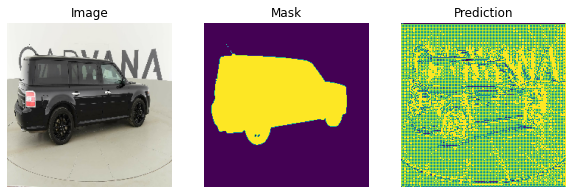

In [25]:
segment_first_image(test_dataset)

# Train the segmentation model

In [26]:
EPOCHS = 20

model_history = model.fit(dataset, epochs=EPOCHS, validation_data=test_dataset)#,
                          #callbacks=[DisplayCallback()])

Epoch 1/20
408/408 [==============================] - 150s 368ms/step - loss: 0.0363 - accuracy: 0.9852 - val_loss: 0.0201 - val_accuracy: 0.9920
Epoch 2/20
408/408 [==============================] - 151s 371ms/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.0151 - val_accuracy: 0.9940
Epoch 3/20
408/408 [==============================] - 151s 370ms/step - loss: 0.0131 - accuracy: 0.9948 - val_loss: 0.0140 - val_accuracy: 0.9945
Epoch 4/20
408/408 [==============================] - 153s 375ms/step - loss: 0.0118 - accuracy: 0.9952 - val_loss: 0.0134 - val_accuracy: 0.9947
Epoch 5/20
408/408 [==============================] - 153s 376ms/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 6/20
408/408 [==============================] - 152s 374ms/step - loss: 0.0102 - accuracy: 0.9959 - val_loss: 0.0124 - val_accuracy: 0.9951
Epoch 7/20
408/408 [==============================] - 152s 373ms/step - loss: 0.0095 - accuracy: 0.9961 - val_loss: 0.0121 -

# Success!  99% Accuracy
# Visualize the segmentation after training

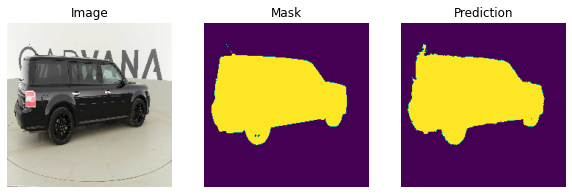

In [27]:
segment_first_image(test_dataset)